# Hierarchical Clustering

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
df=pd.read_csv('buddymove_holidayiq.csv')
df.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [4]:
X=df.iloc[:,1:].values

# Feature Scalling

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

## Using the elbow method to find the optimal number of clusters

No handles with labels found to put in legend.


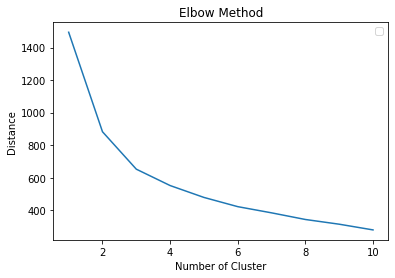

In [6]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=10)
  km.fit(X)
  wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Distance')
plt.legend()
plt.show()

# Use Dendrograph to find optimal No of Cluster

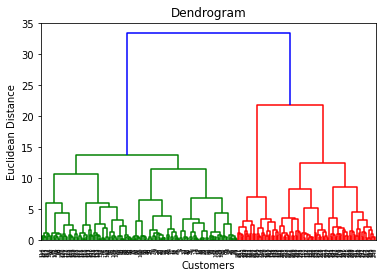

In [7]:
from scipy.cluster import hierarchy as sch
dendrogram=sch.dendrogram(Z=sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

## Training the  Hierarchical Clustering model on the dataset

In [11]:
from sklearn.cluster import AgglomerativeClustering
agc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_agc=agc.fit_predict(X)
y_agc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [12]:
df['cluster']=y_agc
df.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic,cluster
0,User 1,2,77,79,69,68,95,1
1,User 2,2,62,76,76,69,68,1
2,User 3,2,50,97,87,50,75,1
3,User 4,2,68,77,95,76,61,1
4,User 5,2,98,54,59,95,86,1


**Calculate No of observation in Cluster bold text**

In [13]:
Cluster_1=len(df[df['cluster']==0])
Cluster_2=len(df[df['cluster']==1])
print('No of Cluster 1 is ',Cluster_1)
print('No of Cluster 2 is ',Cluster_2)

No of Cluster 1 is  103
No of Cluster 2 is  146
